In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# User defined plotting function
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
      ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
      ax.scatter(model.support_vectors_[:, 0],
      model.support_vectors_[:, 1],
      s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Perfectly Linearly Separable Dataset

Shape of X array:  (50, 2)
Shape of y array:  (50,)


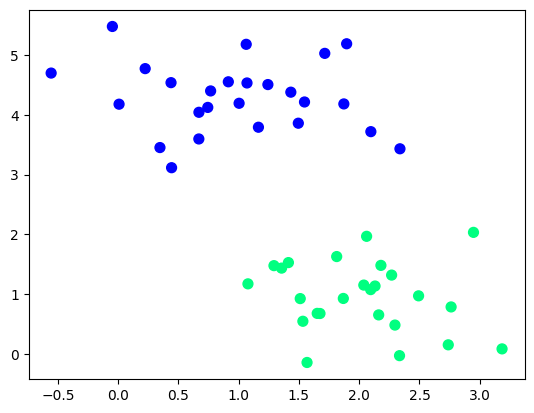

In [ ]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');
print("Shape of X array: ",X.shape)
print("Shape of y array: ",y.shape)

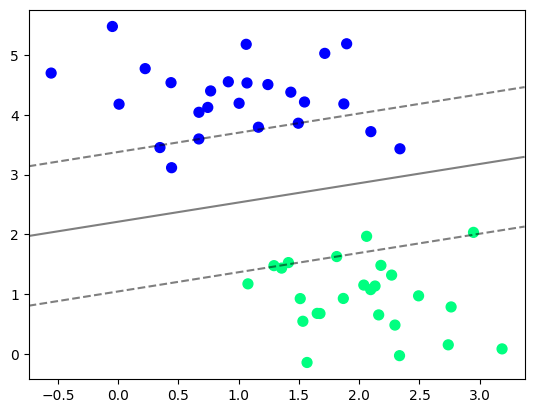

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

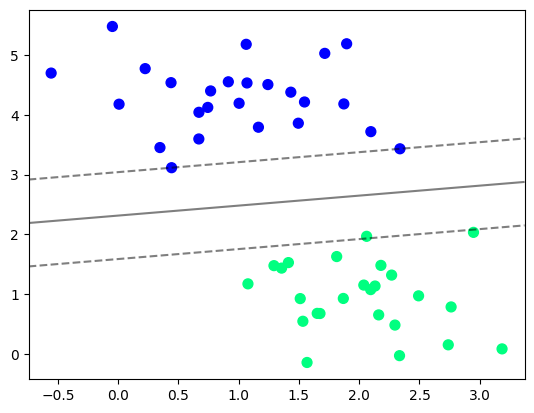

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

## Almost Linearly Separable Dataset

Shape of X array:  (50, 2)
Shape of y array:  (50,)


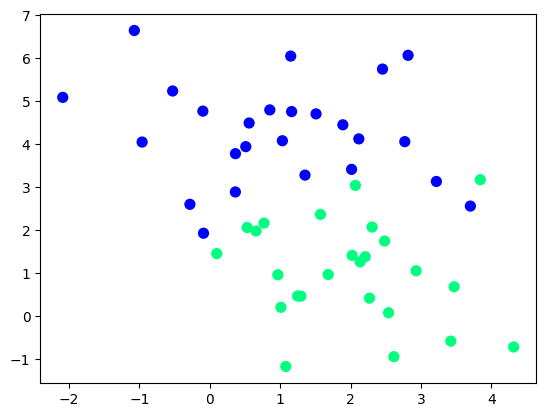

In [ ]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');
print("Shape of X array: ",X.shape)
print("Shape of y array: ",y.shape)

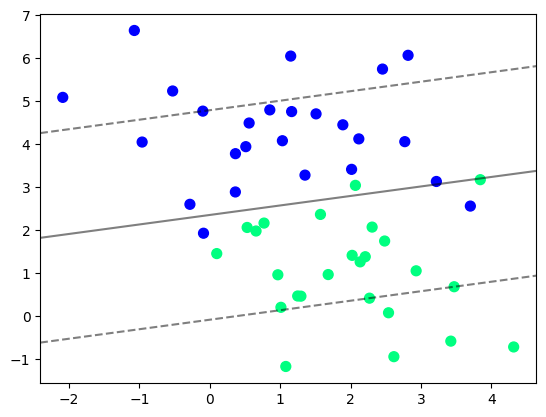

In [ ]:
# With a small value of C, the model will ignore classification errors
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

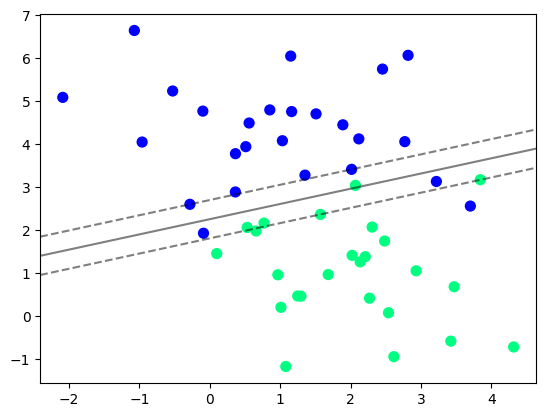

In [ ]:
model = SVC(kernel='linear', C=100)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

## What about Not Linearly Separable Dataset?

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


,x1,x2,y
0,-0.070628,-0.955298,0
1,-0.114435,0.077069,1
2,0.952296,-0.381005,0
3,0.008264,-0.468202,1
4,-0.281060,-0.051566,1
...,...,...,...
95,-0.026076,0.559787,1
96,-0.879248,0.209111,0
97,-0.292361,1.111181,0
98,0.853666,0.575727,0


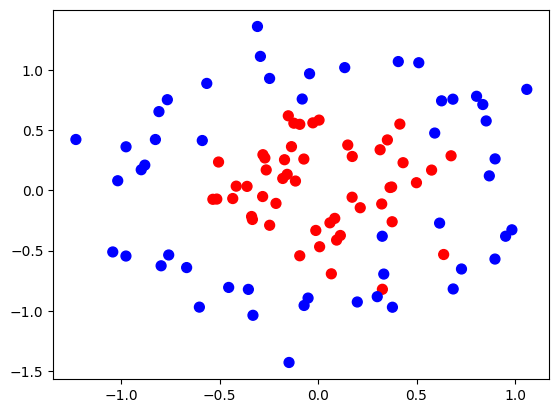

In [16]:

X, y = datasets.make_circles(100, factor=.4, noise=.2, random_state=54)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))
df

## SVC Linear Kernel

Accuracy score:  0.58
F1 score:  0.631578947368421


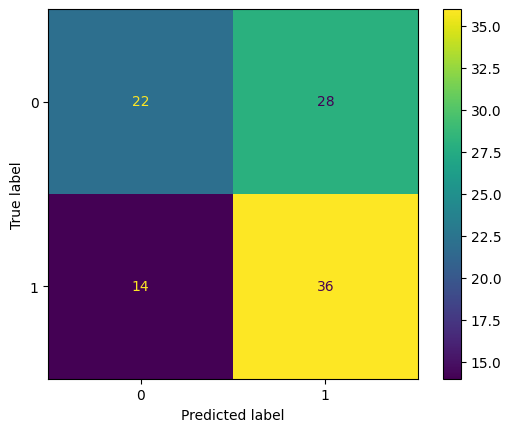

In [17]:
model = SVC(kernel='linear')
model.fit(X, y)
y_pred = model.predict(X)
print("Accuracy score: ", accuracy_score(y, y_pred))
print("F1 score: ", f1_score(y, y_pred))
ConfusionMatrixDisplay.from_predictions(y, y_pred);

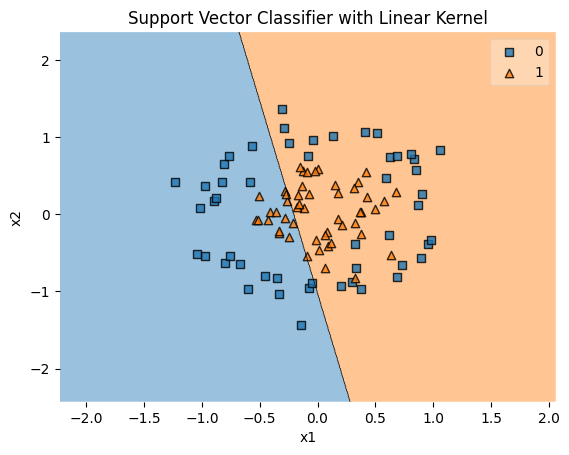

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X, y=y, clf=model)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Support Vector Classifier with Linear Kernel')
plt.show();

## SVC Polynomial Kernel

Accuracy score:  0.93
F1 score:  0.9320388349514563


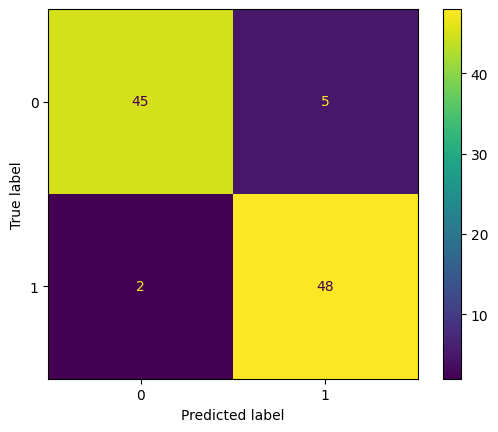

In [20]:
model = SVC(kernel='poly', degree=2) # Try other values of degree
model.fit(X, y)
y_pred = model.predict(X)
print("Accuracy score: ", accuracy_score(y, y_pred))
print("F1 score: ", f1_score(y, y_pred))
ConfusionMatrixDisplay.from_predictions(y, y_pred);

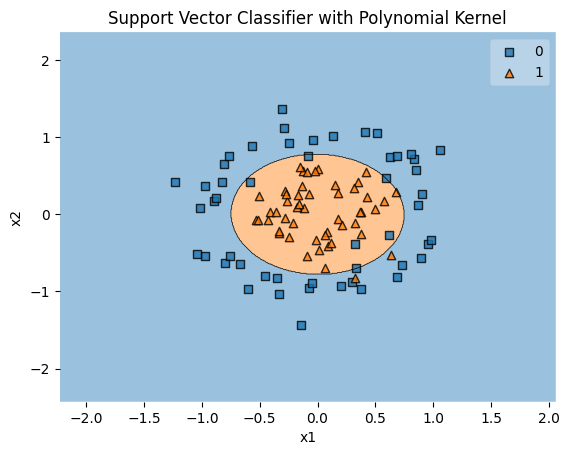

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X, y=y, clf=model)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Support Vector Classifier with Polynomial Kernel')
plt.show();

## SVC with RBF Kernel

Accuracy score:  0.99
F1 score:  0.98989898989899


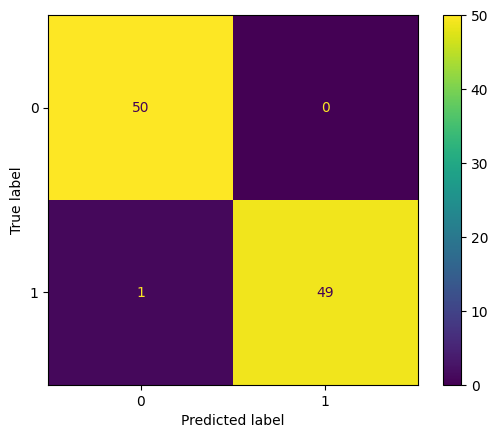

In [22]:
model = SVC(kernel='rbf', gamma=50)
model.fit(X, y)
y_pred = model.predict(X)
print("Accuracy score: ", accuracy_score(y, y_pred))
print("F1 score: ", f1_score(y, y_pred))
ConfusionMatrixDisplay.from_predictions(y, y_pred);

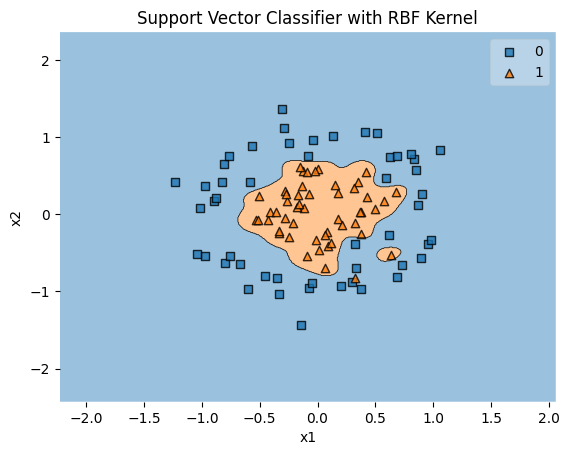

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X, y=y, clf=model)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Support Vector Classifier with RBF Kernel')
plt.show();

---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Umt_logo.png"> 

<h1 align="center">Department of Computer Science</h1>
<h1 align="center">Course: Machine Learning</h1>

--- 
<h3><div align="right">Instructor: Hafiz Abdul Rehman</div></h3>    
  

<h1 align="center">Assignment 3: SVM Kernel Selection</h1>
<h1 align="center">Submitted by: Fxxxxxxxxx</h1>